In [14]:
%matplotlib inline

In [15]:
#import packages
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sb

#Read data
data = pd.read_csv("Resources/heart_2020_cleaned.csv")
data.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [16]:
#Understand data
heart_disease_count = data['HeartDisease'].value_counts()
 
print("Number of individuals with heart disease:", heart_disease_count)

Number of individuals with heart disease: HeartDisease
No     292422
Yes     27373
Name: count, dtype: int64


In [17]:
age_groups = data['AgeCategory'].value_counts()
print("These are the different age groups:", age_groups)

These are the different age groups: AgeCategory
65-69          34151
60-64          33686
70-74          31065
55-59          29757
50-54          25382
80 or older    24153
45-49          21791
75-79          21482
18-24          21064
40-44          21006
35-39          20550
30-34          18753
25-29          16955
Name: count, dtype: int64


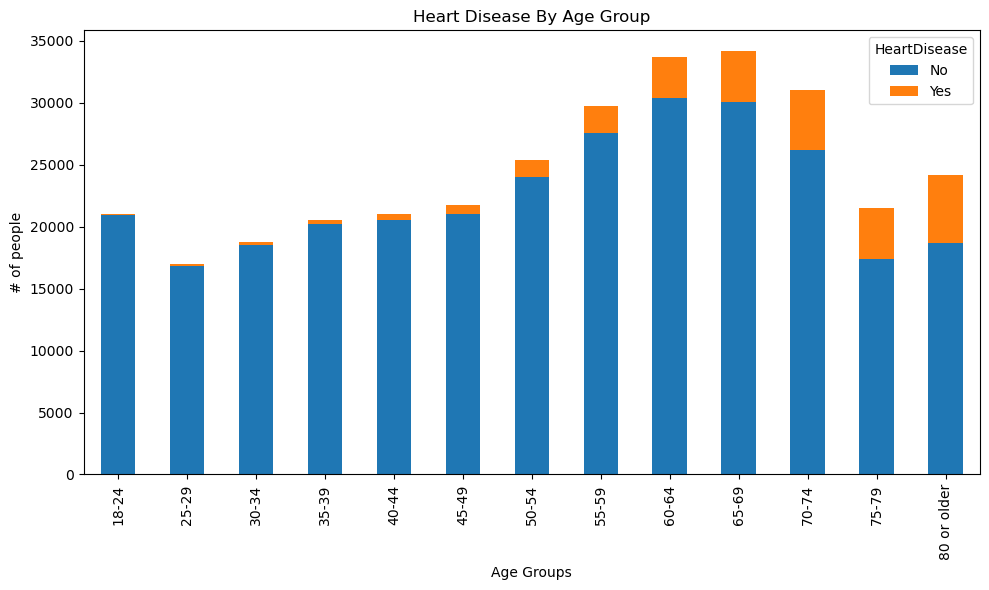

In [18]:
#Group Data by 'AgeGroup' and "HeartDisease' columns
grouped_data_agehd = data.groupby(["AgeCategory", "HeartDisease"]).size().unstack(fill_value=0)
colors = ["firebrick","lightgray"]
#Plot grouped bar chart
grouped_data_agehd.plot(kind='bar', stacked=True, figsize=(10,6))

#Add labels, title etc.
plt.xlabel('Age Groups')
plt.ylabel('# of people')
plt.title('Heart Disease By Age Group')

plt.tight_layout()
plt.show()

In [19]:
#Clean starter data
cleanedyes_data= data[data['HeartDisease'] == 'Yes']
cleanedyes_data.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
5,Yes,28.87,Yes,No,No,6.0,0.0,Yes,Female,75-79,Black,No,No,Fair,12.0,No,No,No
10,Yes,34.30,Yes,No,No,30.0,0.0,Yes,Male,60-64,White,Yes,No,Poor,15.0,Yes,No,No
35,Yes,32.98,Yes,No,Yes,10.0,0.0,Yes,Male,75-79,White,Yes,Yes,Poor,4.0,No,No,Yes
42,Yes,25.06,No,No,No,0.0,0.0,Yes,Female,80 or older,White,Yes,No,Good,7.0,No,No,Yes
43,Yes,30.23,Yes,No,No,6.0,2.0,Yes,Female,75-79,White,Yes,Yes,Fair,8.0,No,Yes,No


In [20]:
#Calculate counts for males and females w/ and w/ heart disease
males_yeshd= data[(data['Sex'] == 'Male') & (data['HeartDisease'] == 'Yes')].shape[0]
females_yeshd= data[(data['Sex'] == 'Female') & (data['HeartDisease'] == 'Yes')].shape[0]
males_nohd= data[(data['Sex'] == 'Male') & (data['HeartDisease'] == 'No')].shape[0]
females_nohd= data[(data['Sex'] == 'Female') & (data['HeartDisease'] == 'No')].shape[0]

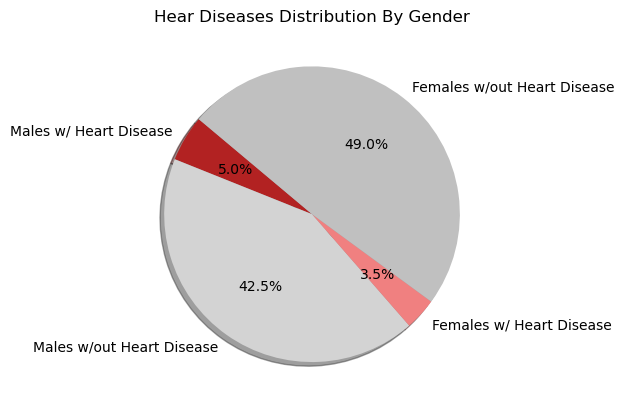

In [21]:
#Prepare Pie graph
labels = ["Males w/ Heart Disease", "Males w/out Heart Disease","Females w/ Heart Disease", "Females w/out Heart Disease"]
sizes = [males_yeshd, males_nohd, females_yeshd,females_nohd]
colors = ["firebrick","lightgray","lightcoral","silver"]

#Plot difference between males and females with heart disease
plt.pie(sizes, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=140)
# Create axes which are equal so we have a perfect circle
plt.title('Hear Diseases Distribution By Gender')
plt.show()

In [22]:
#Prepare the data for plotting

heatmap_data = data.pivot_table(index='AgeCategory', columns='Sex', aggfunc='sum')

# Step 4: Plot the heatmap using matplotlib/seaborn
plt.figure(figsize=(10, 6))
sb.heatmap(heatmap_data, cmap='coolwarm', annot=False, linewidths=.5, cbar=False) # Set annot=False
plt.title('Heatmap of Age Groups and Sex')
plt.xlabel('Sex')
plt.ylabel('Age Group')
plt.show()

ValueError: could not convert string to float: 'NoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesNoNoYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoYesYesNoYesNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoYesNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoYesNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoYesNoNoYesNoNoYesNoNoNoNoNoYesNoNoNoNoNoNoYesNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoYesNoNoYesNoNoNoNoNoYesNoNoNoNoNoYesNoNoNoNoYesNoNoNoYesNoNoNoNoNoNoNoNoNoNoYesNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoYesNoYesNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoYesNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoYesNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoYesYesNoYesNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoYesNoNoYesNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesNoNoNoNoNoNoNoNoYesNoNoNoYesNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoYesNoNoNoNoYesNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoYesNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoYesYesNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoYesNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoYesNoYesYesNoYesNoNoNoNoNoNoNoNoNoNoNoYesNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesNoNoNoYesNoNoNoNoNoNoNoYesYesNoNoNoNoNoYesNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoYesNoNoNoNoNoNoYesNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoYesNoNoYesNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoYesNoNoYesNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesNoNoNoNoNoNoNoNoNoNoNoYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoYesYesNoNoNoNoNoYesNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoYesNoNoYesYesNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoYesNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoYesNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoYesNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoYesNoNoYesNoNoNoNoNoNoNoNoYesNoNoNoNoNoYesNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoYesNoNoYesNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoYesYesYesNoNoNoNoNoNoYesNoNoNoNoYesYesNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesNoNoNoNoNoNoNoNoNoYesNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoYesNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoYesNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoYesNoNoNoYesNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoYesNoYesNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoYesNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoYesNoNoNoYesNoNoYesNoNoNoNoNoNoNoNoYesNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoYesNoYesNoNoYesNoNoNoNoNoYesNoNoNoNoNoNoNoYesNoNoNoNoNoYesNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoYesNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoYesNoNoNoNoYesNoNoNoNoYesYesNoNoYesNoYesNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesNoNoNoYesNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoYesYesNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoYesNoYesNoYesNoNoNoYesYesYesNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoYesNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoYesNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoYesYesNoNoYesNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoYesYesNoNoYesNoNoNoNoNoNoNoNoNoNoNoYesNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoYesNoYesNoNoNoNoNoYesNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoYesNoNoNoYesNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoYesNoNoYesNoNoNoNoNoNoNoNoNoNoNoYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoYesYesNoNoNoYesNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoYesNoNoNoNoNoNoYesNoNoNoNoNoYesNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoYesNoNoNoYesNoNoNoNoNoNoNoNoNoNoYesNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoYesNoNoYesNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoYesNoNoNoNoNoYesNoNoNoYesNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoYesNoNoYesNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoYesYesNoNoNoNoNoNoNoNoYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesNoNoNoNoNoYesYesYesNoNoNoYesNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoYesYesNoYesNoNoNoNoNoNoNoNoNoNoNoYesNoYesNoNoNoNoNoYesNoNoNoNoNoNoNoYesNoYesNoNoNoNoNoNoYesNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoYesNoNoNoNoYesNoNoNoNoYesNoNoNoYesNoNoNoNoNoNoYesNoYesYesNoNoNoNoNoNoYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoYesNoNoNoYesNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoYesNoNoNoYesNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesNoNoYesNoNoNoNoNoYesNoYesYesNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoYesNoYesNoNoNoNoNoNoNoYesNoNoNoNoNoNoYesNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoYesYesNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoYesNoNoYesNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesNoNoNoNoNoYesNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoYesNoNoYesNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoYesNoNoYesNoNoNoNoYesNoNoNoNoNoYesYesNoYesNoNoNoNoNoYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesYesNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoYesNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoYesNoNoNoYesNoNoYesNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoYesNoNoYesNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesNoNoNoNoNoNoNoNoNoYesNoNoNoYesNoNoNoNoNoYesNoNoYesNoNoNoYesNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoYesNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoYesNoNoNoNoNoNoNoYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoYesNoNoNoNoNoYesNoNoNoNoNoNoYesNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoYesNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoYesYesNoNoYesNoNoYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoYesNoNoYesNoNoNoNoYesNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoYesNoNoNoNoNoNoNoNoNoYesNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoYesNoNoNoNoNoNoYesNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoYesNoNoNoYesYesNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoYesYesNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesNoNoYesNoNoYesNoNoNoNoYesYesNoNoYesNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoYesNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoYesNoYesNoNoNoYesNoNoNoNoNoNoNoNoYesNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesNoNoNoNoNoNoYesNoNoYesNoYesNoNoNoNoNoYesNoNoYesYesNoNoNoNoNoNoYesNoNoYesNoNoNoNoNoYesNoYesNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoYesNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoYesNoYesNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoYesNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoYesNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNo'

<Figure size 1000x600 with 0 Axes>